<a href="https://colab.research.google.com/github/ReaganTiburan/Cost-of-1GB-of-Mobile-Data-in-Every-Country/blob/main/01_Data_Visualization_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Datasets

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo Project/Coding Dojo/04 Week 4: Explanatory Viz/03 Attachments/Cost of 1GB of Data.xlsx'
filename1 = '/content/drive/MyDrive/Coding Dojo Project/Coding Dojo/04 Week 4: Explanatory Viz/03 Attachments/World Tile Map.xlsx'
df = pd.read_excel(filename)
wm = pd.read_excel(filename1)
# merge two dataframe
df = pd.merge(df, 
                      wm, 
                      on ='Country', 
                      how ='inner')
df.head()

,Rank,Country,Avg Price of 1GB (USD),Row,Col,Code,Continent
0,1,India,0.09,11,23,IND,Asia
1,2,Israel,0.11,11,19,ISR,Asia
2,3,Kyrgyzstan,0.21,7,24,KYR,Asia
3,4,Italy,0.43,8,14,ITA,Europe
4,5,Ukraine,0.46,6,18,UKR,Europe


## Creating a Histogram 

It code graph below shows the distribution of all countries average price of
1GB. It shows that majority of the countries has less than $5 dollar per 1GB of mobile data cost.


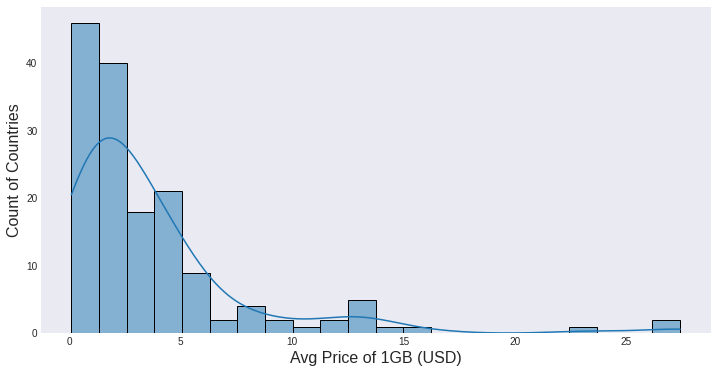

In [4]:
plt.style.use('seaborn-dark')
# Set the plots figure size
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
# Create a histogram using seaborn
g = sns.histplot(data=df, x='Avg Price of 1GB (USD)', kde = True,);
# set parameters for our x label   
plt.xlabel('Avg Price of 1GB (USD)', fontsize = 16);
# # set parameters for our y label 
plt.ylabel('Count of Countries', fontsize = 16);

Below code and charts will show count of countries that  are Above or Below the calculated Mean Cost of 1GB Mobile Data in our datasets.

In [5]:
# Get the mean of column Avg Price of 1GB (USD)
filter = df['Avg Price of 1GB (USD)'].mean()
# Filter above the mean
above_df = df['Avg Price of 1GB (USD)'] > df['Avg Price of 1GB (USD)'].mean()
#Convert to a dataframe
above_mean = df.loc[above_df, :]
# Filter below the mean
below_df = df['Avg Price of 1GB (USD)'] < df['Avg Price of 1GB (USD)'].mean()
# Convert to a dataframe
below_mean = df.loc[below_df, :]

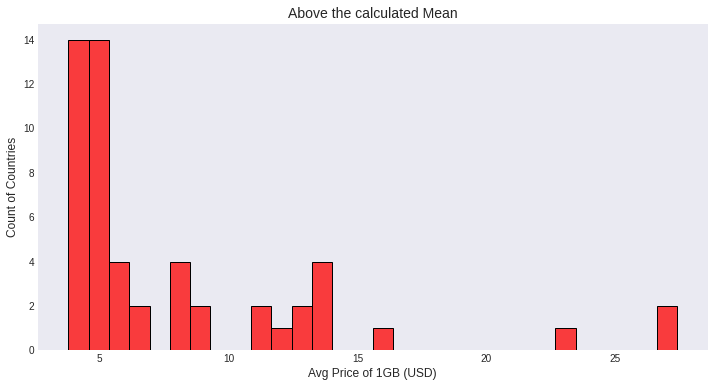

In [6]:
# Set the plots figure size
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
# # Create a histogram using seaborn
g = sns.histplot(data=above_mean, x='Avg Price of 1GB (USD)', bins = 30, color = 'red');
# Set parameters of xlabel
plt.xlabel('Avg Price of 1GB (USD)', fontsize = 12);
# Set parameters of ylabel
plt.ylabel('Count of Countries', fontsize = 12);
# Provide title
plt.title('Above the calculated Mean', fontsize = 14);

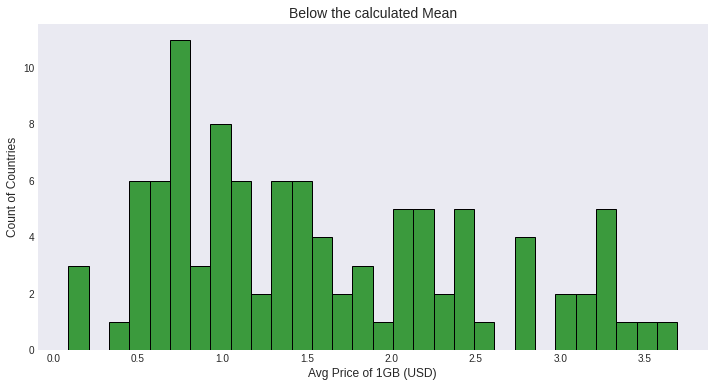

In [7]:
# Set the plots figure size
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
# # Create a histogram using seaborn
g = sns.histplot(data=below_mean, x='Avg Price of 1GB (USD)', bins = 30, color = 'green');
# Set parameters of xlabel
plt.xlabel('Avg Price of 1GB (USD)', fontsize = 12);
# Set parameters of ylabel
plt.ylabel('Count of Countries', fontsize = 12);
# Provide title
plt.title('Below the calculated Mean', fontsize = 14);

### Creating a Bar Plot

Below code and charts will show the Top 10 Highest and Lowest Countries cost of Mobile Data. 

In [8]:
expensive = df.loc[:,:].groupby(['Country'])['Avg Price of 1GB (USD)'].sum().sort_values(ascending = False).head(10) 
cheap = df.loc[:,:].groupby(['Country'])['Avg Price of 1GB (USD)'].sum().sort_values(ascending = True).head(10) 

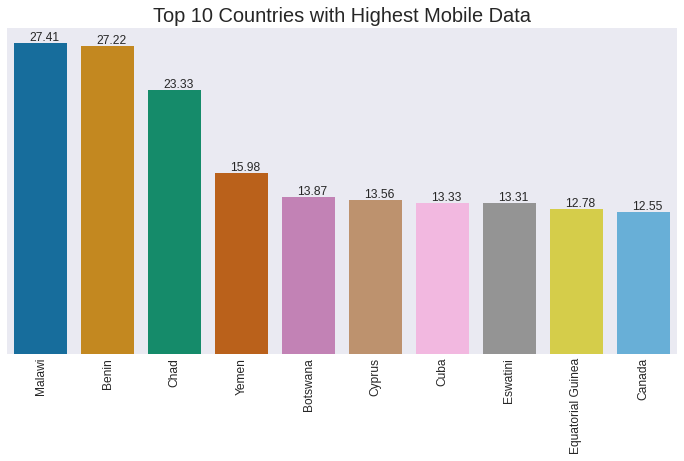

In [9]:
# Set figure size of the chart
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
# Create Bar Plot with its parameters
g = sns.barplot(x=expensive.index, y=expensive.values, palette = 'colorblind')
# Remove borders
for i in ['top', 'left','right']:
    g.spines[i].set_visible(False)
# Display value at the top of the bar      
for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+.2,
           (i.get_height()),
           fontsize=12)
# set our xticks parameters   
plt.xticks(rotation = 90, fontsize = 12);
# set y ticklabels empty 
g.set(yticklabels=[])
# xlabel empty
plt.xlabel('')
# y label empty
plt.ylabel('')
# provide title to the chart
plt.title('Top 10 Countries with Highest Mobile Data', fontsize = 20);


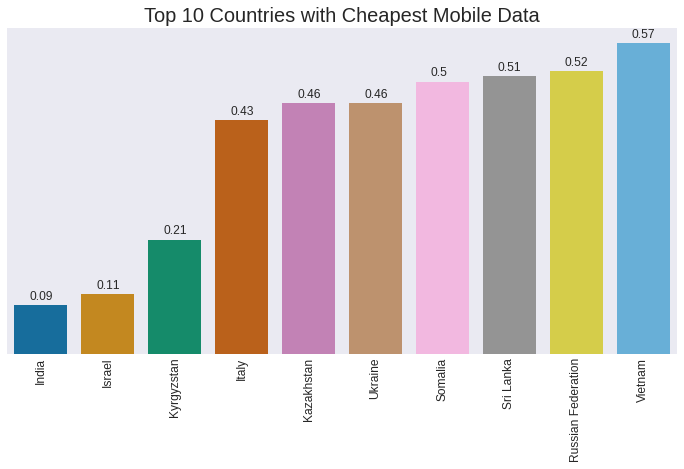

In [10]:
# Set figure size of the chart
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
# Create a Bar Plot with its parameters
g = sns.barplot(x=cheap.index, y=cheap.values, palette = 'colorblind')
# Remove borders
for i in ['top', 'left', 'right']:
    g.spines[i].set_visible(False)
# Display value at the top of the bar 
for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+0.01,
           (i.get_height()),
           fontsize=12)
# set our xticks parameters     
plt.xticks(rotation = 90, fontsize = 12);
# set y ticklabels empty 
g.set(yticklabels=[])
# xlabel empty
plt.xlabel('')
# y label empty
plt.ylabel('')
# provide title to the chart
plt.title('Top 10 Countries with Cheapest Mobile Data', fontsize = 20);

## Creating a Box Plot

The code and chart below shows a Box Plot for each continent. I shows that North America has the highest mean per continent wise, while Asia has the lowest mean.

In [11]:
# below set of code blocks uses filter, storing them in variables.
africa = df.loc[df['Continent'] == 'Africa','Avg Price of 1GB (USD)'].values
asia = df.loc[df['Continent'] == 'Asia','Avg Price of 1GB (USD)'].values
europe = df.loc[df['Continent'] == 'Europe', 'Avg Price of 1GB (USD)'].values
south_america = df.loc[df['Continent'] == 'South America', 'Avg Price of 1GB (USD)'].values
central_america = df.loc[df['Continent'] == 'Central America', 'Avg Price of 1GB (USD)'].values
north_america = df.loc[df['Continent'] == 'North America', 'Avg Price of 1GB (USD)'].values
caribean = df.loc[df['Continent'] == 'Caribbean', 'Avg Price of 1GB (USD)'].values
oceania = df.loc[df['Continent'] == 'Oceania', 'Avg Price of 1GB (USD)'].values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


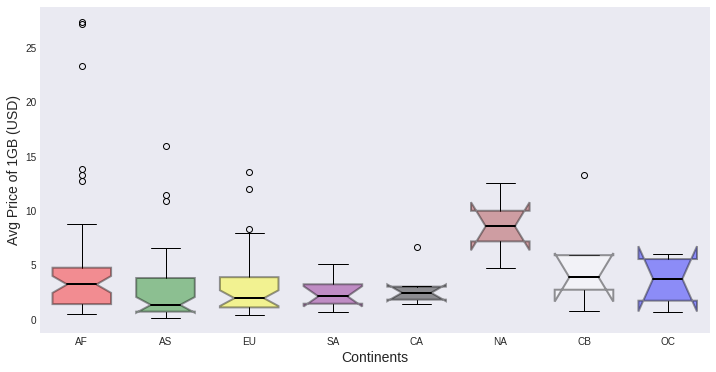

In [12]:
# Set figure size of the chart
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6));
# Create the Box Plot with its parameters
boxplots = axes.boxplot([africa,asia, europe, south_america, central_america, north_america, caribean, oceania],
                         notch = True,
                         labels = ['AF', 'AS', 'EU', 'SA', 'CA', 'NA', 'CB', 'OC'],
                         widths = .7,
                         patch_artist = True,
                         medianprops = dict(linestyle = '-', linewidth = 2, color = 'Black'),
                         boxprops = dict(linestyle = '--', linewidth = 2, color = 'Black', facecolor = 'blue', alpha = .4));
# create color container                         
colors = ['red', 'green', 'yellow', 'purple', 'black', 'brown', 'white' ]
# asign colors for the box plots
for bplot in (boxplots):
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color);
# Set xlabel with parameters        
plt.xlabel('Continents', fontsize = 14);
# Set ylabel with parameters  
plt.ylabel('Avg Price of 1GB (USD)', fontsize = 14);
# Set xticks
plt.xticks(fontsize = 10);
# Set yticks
plt.yticks(fontsize = 10);